In [20]:
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

plt.style.use("ggplot")

# Etude des données de vitesse de galaxies
## Importation des données

In [21]:
velocity = pd.read_excel("2223G3-SDIA-Galaxy.xlsx",index_col=None, header=None).to_numpy().ravel()
velocity = np.array(velocity,dtype = float)
pd.DataFrame(velocity,columns=["Velocity"]).head(5)

,Velocity
0,9172.0
1,9350.0
2,9483.0
3,9558.0
4,9775.0


## Définition de la fonction de création d'une gaussienne

In [22]:
def gm_pdf(x, mu, sigma, p):
    resultat = 0
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
    elif len(sigma) != len(p):
            print('Erreur de dimension sur la variance')
    else:
        for i in range(0, len(p)):
            resultat = resultat + p[i] * norm.pdf(x = x, loc = mu[i], scale = sigma[i])
    return resultat

## Création des fonctions d'affichage

In [25]:
def plot_histo_data(df):
    plt.hist(df, bins = 30, density = True, color = 'green', edgecolor = "red")
    plt.xlabel('Vitesse')
    plt.ylabel('Probabilité')
    plt.title("Répartition des données de vitesse de galaxies")
    plt.show()

def plot_histo_gaussienne(df,mu_em, sigma_em, alpha_em):
    plt.hist(df, bins = 30, density = True, color = 'green', edgecolor = "red")
    x = np.arange(8000, 35000, 100)
    pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
    plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée de la densité de probabilité')
    plt.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.xlabel('Vitesse')
    plt.ylabel('Probabilité')
    plt.show()

## Affichage des données 

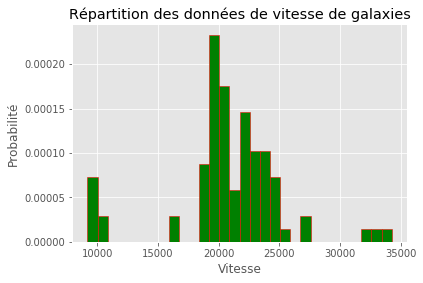

In [26]:
plot_histo_data(velocity)

## Implémentation de l'algorithme EM 

In [28]:
def algoEM(df,nbEchantillon, mu_em, sigma_em, alpha_em,nbMaxIterations = 40,nbIteration = 1):
    # Initialisation
    nbComposante = len(alpha_em) #Nombre de composantes du mélange
    nbDonnees = len(df)  #Nombre de données
    p = np.zeros(shape=(nbComposante, nbDonnees))
    #Déclaration et initialisation de la matrice qui va contenir les probabilités
    #p(k|x,theta_courant)
    nbEchantillon = len(df)
    alpha_em_new = alpha_em
    sigma_em_carre_new = sigma_em
    mu_em_new = mu_em
    donneesP = np.zeros(shape=(nbEchantillon))

    while nbIteration < nbMaxIterations:
        for n in range(0, nbDonnees, 1):
            for k in range(0, nbComposante, 1):
                p[k, n] = alpha_em[k] * norm.pdf(x = df[n], loc = mu_em[k], scale = sigma_em[k])
            p[:, n] = p[:, n] / np.sum(p[:, n])
        for k in range(0, nbComposante, 1):
            alpha_em_new[k] = np.sum(p[k,:]) / nbDonnees
            for n in range(0, nbDonnees, 1):
                donneesP[n] = df[n] * p[k, n]
            mu_em_new[k]  = np.sum(donneesP) / np.sum(p[k, :])
            for n in range(nbDonnees):
                donneesP[n] = ((df[n] - mu_em_new[k]) ** 2) * p[k, n]
            sigma_em_carre_new[k] = np.sum(donneesP) / np.sum(p[k, :])

        mu_em = mu_em_new
        sigma_em = np.sqrt(sigma_em_carre_new)
        alpha_em = alpha_em_new
        nbIteration = nbIteration + 1
        
    return mu_em, sigma_em, alpha_em



# Simulation d'un $\textit{ Gaussian Mixture Model}$ avec EM

## Simulation à 2 gaussiennes

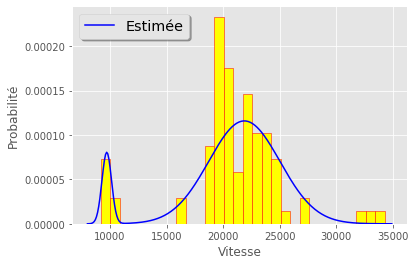

In [31]:
mu = np.array([10000, 25000])
sigma = np.array([1000, 1000])
alpha = np.array([0.10, 0.9])
mu_em, sigma_em, alpha_em = algoEM(velocity,nbEchantillon, mu, sigma, alpha)
plot(velocity,mu_em, sigma_em, alpha_em)

## Simulation à 3 gaussiennes

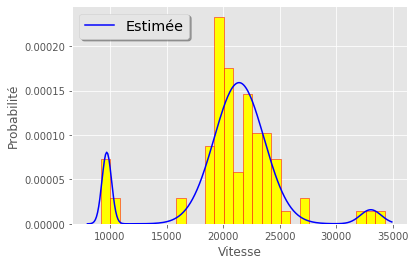

In [60]:
mu = np.array([10000, 20000,33000])
sigma = np.array([1000, 1000,1000])
alpha = np.array([0.05, 0.9,0.05])
mu_em, sigma_em, alpha_em = algoEM(velocity,nbEchantillon, mu, sigma, alpha,)
plot(velocity,mu_em, sigma_em, alpha_em)

## Simulation à $n$ gaussiennes

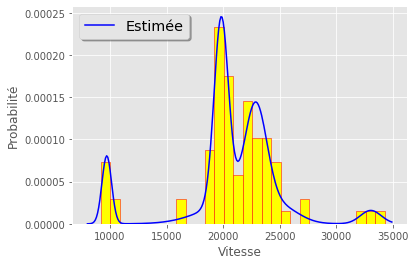

In [63]:
n= 6
nbMaxIterations = 100
nbIteration = 1

def GMM(n): 
    mu = np.linspace(10000,35000,n)
    sigma = 10000*np.ones(n)
    alpha = 1/n*np.ones(n)
    mu_em, sigma_em, alpha_em = algoEM(velocity,nbEchantillon, mu, sigma, alpha,nbMaxIterations,nbIteration )
    plot(velocity,mu_em, sigma_em, alpha_em)
GMM(n)

Le modèle qui semble généraliser la distribution des vitesses de galaxie est celui à 3 ou 4 gaussiennes. Il nous faudrait plus de données pour savoir s'il est plus intéréssant d'utiliser un modèle plus complexe et estimer si la quantité de galaxie de vitesse entre 21500 et 23500 est plus faible.